In [5]:
import numpy as np
import pandas as pd 
import os

# Vizualizare
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [6]:
from sktime.datasets import load_from_arff_to_dataframe

DATA_PATH = "data"
X_train, y_train = load_from_arff_to_dataframe(
    os.path.join(DATA_PATH, "RacketSports/RacketSports_TRAIN.arff")
)

X_test, y_test = load_from_arff_to_dataframe(
    os.path.join(DATA_PATH, "RacketSports/RacketSports_TEST.arff")
)

# 3.1

## 1.

/home/andrei/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '39'), Text(0, 0, '43'), Text(0, 0, '35'), Text(0, 0, '34')]

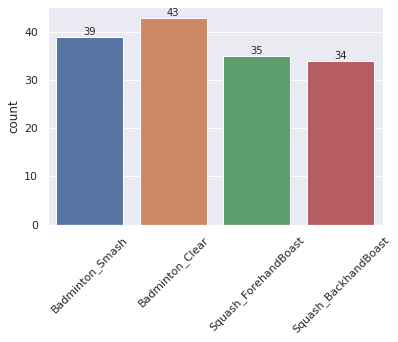

In [7]:
plt.xticks(rotation=45)
ax = sns.countplot(y_train)
ax.bar_label(ax.containers[0])

/home/andrei/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '40'), Text(0, 0, '43'), Text(0, 0, '35'), Text(0, 0, '34')]

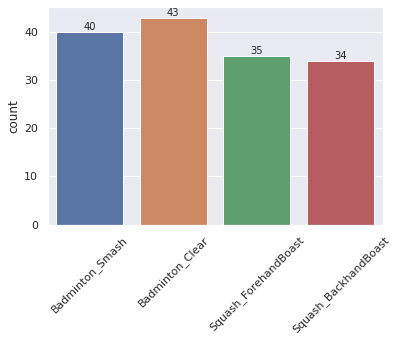

In [8]:
plt.xticks(rotation=45)
ax = sns.countplot(y_test)
ax.bar_label(ax.containers[0])

## 2.

### 1.

Action type: Badminton_Clear


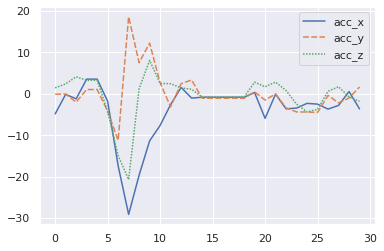

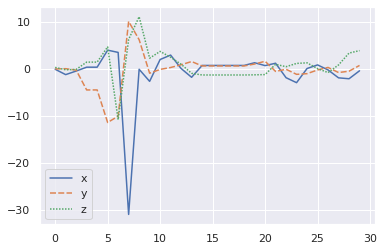

Action type: Badminton_Smash


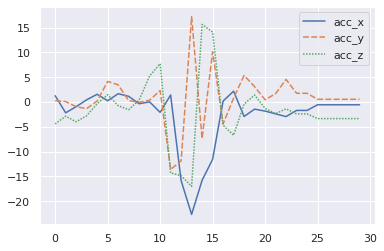

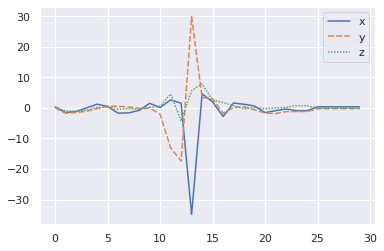

Action type: Squash_BackhandBoast


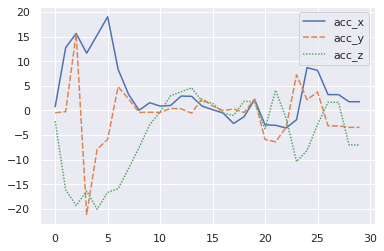

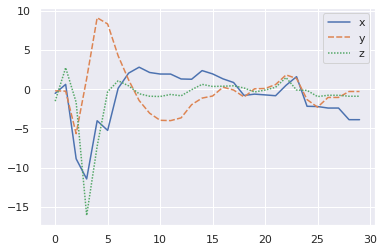

Action type: Squash_ForehandBoast


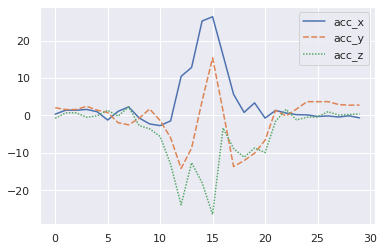

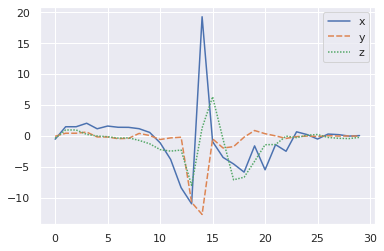

In [7]:
def display_acc(X, idx):
    acc_x = X.iloc[idx].dim_0
    acc_y = X.iloc[idx].dim_1
    acc_z = X.iloc[idx].dim_2

    df = pd.DataFrame(
        {
            "acc_x":acc_x,
            "acc_y":acc_y,
            "acc_z":acc_z
        }
    )

    sns.lineplot(data=df)
    plt.show()

def display_gyro(X, idx):
    x = X.iloc[idx].dim_3
    y = X.iloc[idx].dim_4
    z = X.iloc[idx].dim_5

    df = pd.DataFrame(
        {
            "x":x,
            "y":y,
            "z":z
        }
    )

    sns.lineplot(data=df)
    plt.show()

action_types = np.unique(y_train) 

for action_type in action_types:
    print(f"Action type: {action_type}")
    idx = np.nonzero(y_train == action_type)[0][0]

    display_acc(X_train, idx)
    display_gyro(X_train,idx)

### 2.

In [9]:
mit_bih_train = pd.read_csv(os.path.join("data","ECG","mitbih_train.csv"),header=None)
mit_bih_test = pd.read_csv(os.path.join("data","ECG","mitbih_test.csv"),header=None)
ptbdb_normal = pd.read_csv(os.path.join("data","ECG","ptbdb_normal.csv"),header=None)
ptbdb_abnormal = pd.read_csv(os.path.join("data","ECG","ptbdb_abnormal.csv"),header=None)

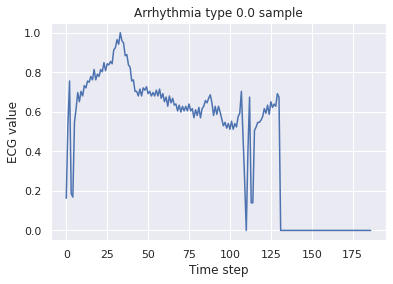

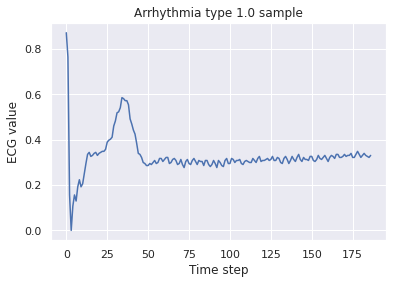

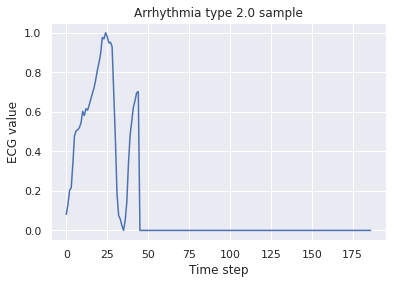

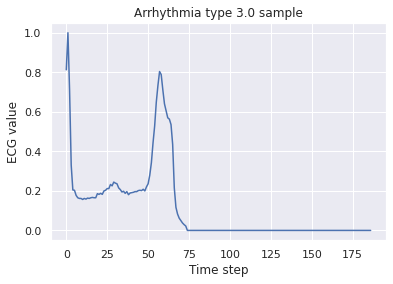

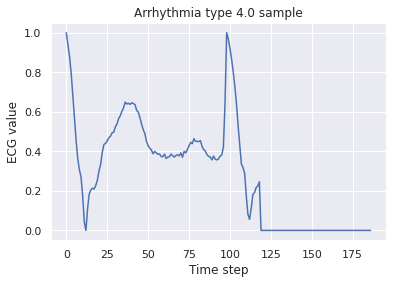

In [41]:
LABEL_COL = 187

mitbih_samples = mit_bih_train.groupby(LABEL_COL).apply(lambda x:x.sample(1, random_state=42))
for idx in range(len(mitbih_samples)):
    sample = mitbih_samples.iloc[idx][:-1]
    sns.lineplot(x=np.arange(len(sample)), y=sample)
    plt.ylabel("ECG value")
    plt.xlabel("Time step")
    plt.title(f"Arrhythmia type {sample.name[0]} sample")
    plt.show()

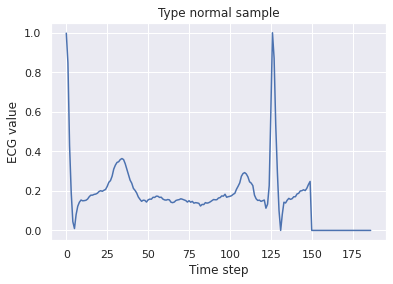

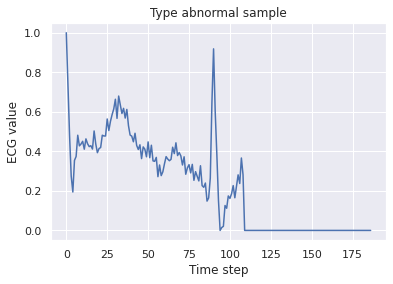

In [42]:
normal_sample = ptbdb_normal.sample(1,random_state=42).iloc[0][:-1]
abnormal_sample = ptbdb_abnormal.sample(1,random_state=42).iloc[0][:-1]
normal_sample

for type, sample in zip(["normal", "abnormal"], [normal_sample, abnormal_sample]):
    sns.lineplot(x=np.arange(len(sample)),y=sample)
    plt.ylabel("ECG value")
    plt.xlabel("Time step")
    plt.title(f"Type {type} sample")
    plt.show()

### 3.

In [31]:
mitbih_all = pd.concat([mit_bih_train, mit_bih_test])

Arrhythmia 0


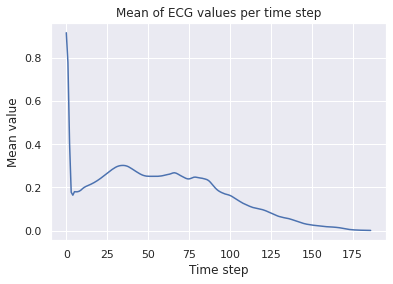

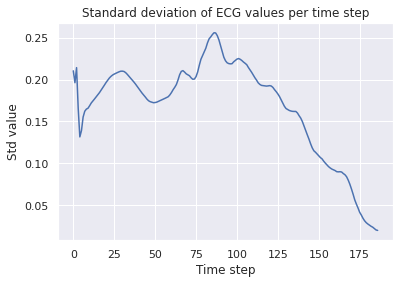

Arrhythmia 1


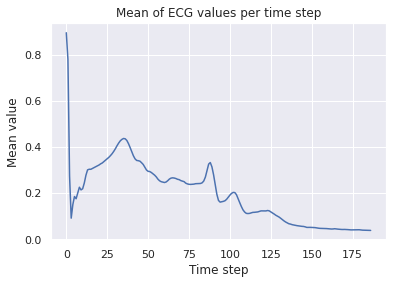

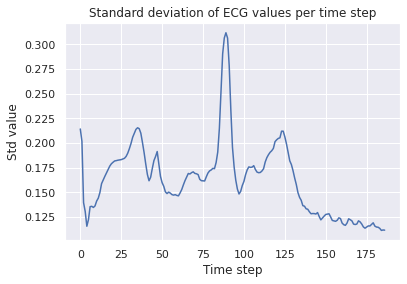

Arrhythmia 2


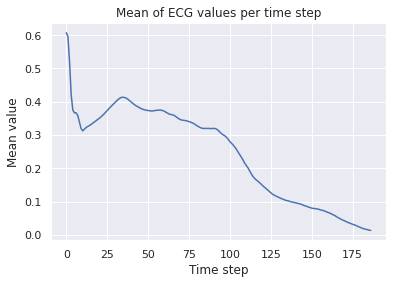

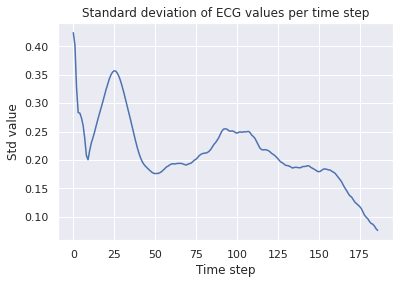

Arrhythmia 3


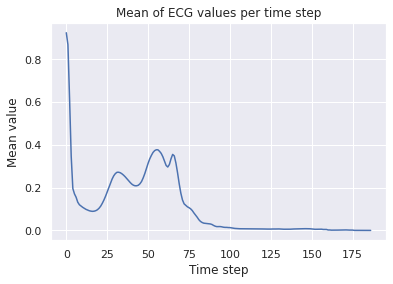

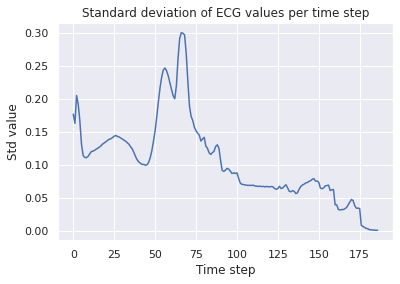

Arrhythmia 4


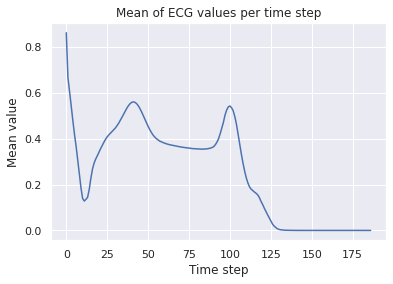

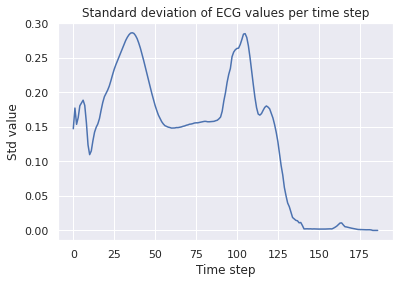

In [39]:
for i in range(5):
    print(f"Arrhythmia {i}")
    series = mitbih_all[mitbih_all[LABEL_COL]==i][range(LABEL_COL)]
    m = series.mean(0)
    s = series.std(0)

    sns.lineplot(x=np.arange(len(m)),y=m)
    plt.xlabel("Time step")
    plt.ylabel("Mean value")
    plt.title("Mean of ECG values per time step")
    plt.show()
    sns.lineplot(x=np.arange(len(s)),y=s)
    plt.xlabel("Time step")
    plt.ylabel("Std value")
    plt.title("Standard deviation of ECG values per time step")
    plt.show()

### 4.

In [43]:
def dataframe2numpy(X):
    N = len(X)
    S = len(X.iloc[0][0])
    H = len(X.columns)
    return np.stack(X.values.reshape(-1)).reshape(N,S,H)

In [47]:
X = dataframe2numpy(X_train)

In [55]:
df = pd.DataFrame(X.reshape(-1,6))
col_names = [f"dim_{i}" for i in range(6)]
df.columns = col_names

In [56]:
df["target"] = y_train.repeat(30)

/home/andrei/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/andrei/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/andrei/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/andrei/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: F

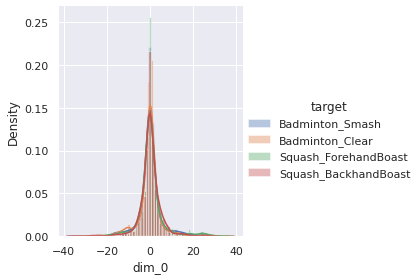

/home/andrei/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/andrei/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/andrei/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/andrei/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: F

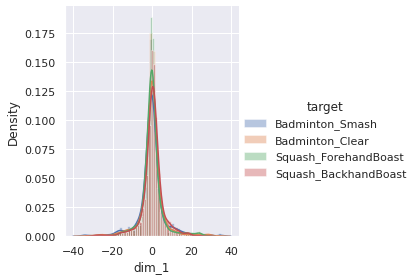

/home/andrei/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/andrei/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/andrei/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/andrei/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: F

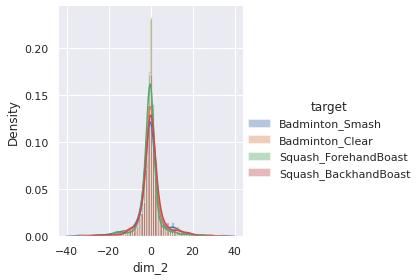

/home/andrei/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/andrei/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/andrei/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/andrei/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: F

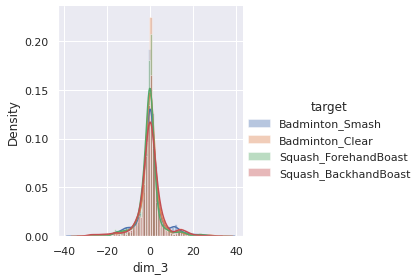

/home/andrei/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/andrei/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/andrei/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/andrei/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: F

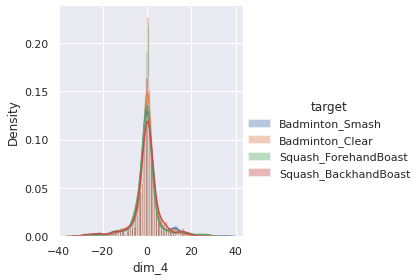

/home/andrei/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/andrei/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/andrei/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/andrei/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: F

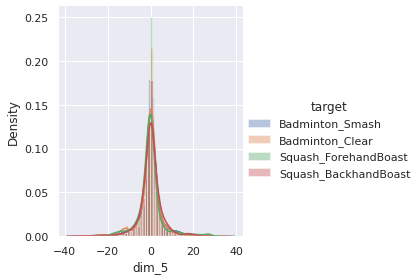

In [57]:
for col in col_names:
    sns.FacetGrid(df, hue="target", size=4).map(sns.distplot, col).add_legend()
    plt.show()